# Orbital Manuever to Geostationary
## Given:
A 2-body system with a spacecraft orbiting Earth with $e = 0.65$, $a = 4.4 R_{Earth}$, $\theta^*_0 = 90^o$, 1 manuever to geostationary at $6.6 R_{Earth}$.

## Find:
a) What are the 2 options? Assue manuever is at $\theta^{*-}_1$. Why?

b) What are the specifications of the manuever $\bar{r}_1$, $\bar{v}_1$,  $\gamma^-_1$. Wait time? $|\Delta \bar{v}|$ and $\alpha$?

c) Plot and mark positions

In [1]:
# Import Functions and basic info
import sys
sys.path.append('../')
from Functions.Universe import Solar_S as SS
from Functions import Keplarian_fnc as kp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
miu = SS.loc['Earth', 'miu']

e_1 = 0.65
a_1 = 4.4 * SS.loc['Earth', 'r']
thst_1_0 = kp.thst.degree(90)

a_2 = 6.6 * SS.loc['Earth', 'r']
e_2 = 0

### Part a)

In [3]:
p_1 = kp.p_a_e(a_1, e_1)
h_1 = kp.h_miu_p(miu, p_1)

p_2 = kp.p_a_e(a_2, e_2)
h_2 = kp.h_miu_p(miu, p_2)

thst_int = kp.thst_int.thst_int(p_1, p_2, e_1, e_2, 0)

thst_diff = thst_int - thst_1_0

if thst_diff.deg[0] < thst_diff.deg[1]:
    print('Spacecraft closer to manuver 1 at (deg):', round(thst_int.deg[0],2))
    thst_man = kp.angle.degree(thst_int.deg[0])
else:
    print('Spacecraft closer to manuver 2 at (deg):', round(thst_int.deg[1],2))
    thst_man = kp.angle.degree(thst_int.deg[1])

Spacecraft closer to manuver 1 at (deg): 161.11


### Part b)

In [4]:
r_11 = kp.distance.keplar_r(p_1, e_1, thst_man.rad)

v_11_mag = kp.velocity.v_a_miu_r(a_1, miu, r_11.mag)
gamma_11 = kp.gamma.gamma_h_r_v_thst(h_1, r_11.mag, v_11_mag, thst_man.rad)
v_11 = kp.velocity.v_gamma(v_11_mag, gamma_11.rad, thst_man.rad)

v_21_mag = kp.velocity.v_a_miu_r(a_2, miu, r_11.mag)
gamma_21 = kp.gamma.degree(0)
v_21 = kp.velocity.v_gamma(v_21_mag, gamma_21.rad, thst_man.rad)

delV_1 = v_21 - v_11

alpha = kp.alpha.alpha_v1rad_delVrad(v_11.rad, delV_1.rad)
alpha.__dict__

{'deg': 289.559464289202, 'rad': 5.053766032157517}

### Part c)

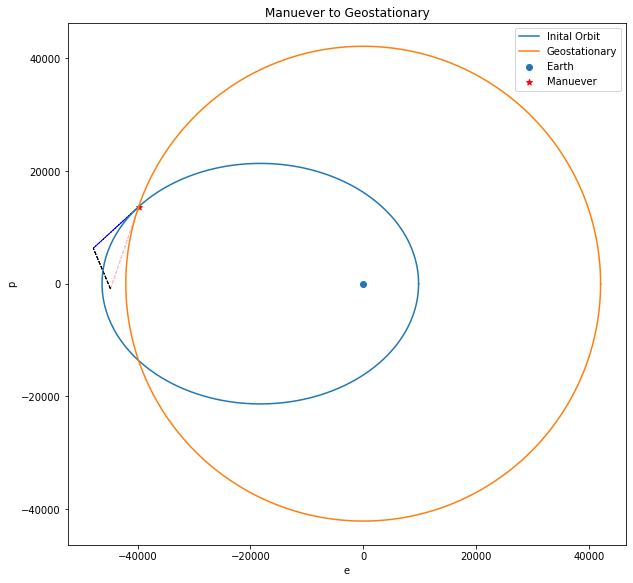

In [8]:
thst_traj = kp.thst.degree(np.linspace(0, 360, 500))
r_1_orbit = kp.distance.keplar_r(p_1, e_1, thst_traj.rad)
r_2_orbit = kp.distance.keplar_r(p_2, e_2, thst_traj.rad)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(r_1_orbit.per[:,0], r_1_orbit.per[:,1], label='Inital Orbit')
ax.plot(r_2_orbit.per[:,0], r_2_orbit.per[:,1], label='Geostationary')
ax.scatter(0, 0, label='Earth')
ax.scatter(r_11.per[0], r_11.per[1], label='Manuever', marker='*', color ='red')
ax.arrow(r_11.per[0], r_11.per[1], v_11.per[0]*5000, v_11.per[1]*5000, color='blue', linestyle='--')
ax.arrow(r_11.per[0], r_11.per[1], v_21.per[0]*5000, v_21.per[1]*5000, color='pink', linestyle='--')
ax.arrow(r_11.per[0]+v_11.per[0]*5000, r_11.per[1]+v_11.per[1]*5000, delV_1.per[0]*5000, delV_1.per[1]*5000, color='black', linestyle='--')
ax.set_aspect('equal', 'box')
ax.set_xlabel('e')
ax.set_ylabel('p')
ax.set_title('Manuever to Geostationary')
ax.legend()